In [282]:
import librosa, torch, IPython
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  cm
from utils import polarToComplex, complexToPolar, reconstructAudioFromBatches
import soundfile as sf
%matplotlib inline

## Testing the whole reconstruction using mag and phase

In [744]:
wav="../datadrive/ljspeech/revWavs/LJ001-0048.wav"
# wav="../datadrive/random/reverbed/CA02_05.wav"
# wav="../../reverberant_speech_classroom.wav"
# wav="../../ML70_06.wav"
# wav="../../ML69_09.wav"
# wav="../../ML69_08-rir-0.6-r2.wav"
# wav="../../MH43_02-rir-0.6-r2.wav"
# wav="../../MD22_02.wav"
# wav="../../LJ019-0132.wav"
# wav="../../FA01_03.wav"

In [745]:
stftParams={
    "window":'hamming',
    "n_fft":512,
    "win_length":32,
}

In [746]:
istftParams={key:val for key, val in stftParams.items() if key!="n_fft"}

In [747]:
# wav="../datadrive/ljspeech/wavs/LJ001-0001.wav"

In [748]:
audio, _=librosa.load(wav, sr=16000)

In [749]:
stft=librosa.stft(audio, **stftParams)
rec=librosa.istft(stft, **istftParams)
sum(audio[:len(rec)] - rec)

2.9481756808058535e-07

In [750]:
mag, phase=complexToPolar(stft)

In [751]:
complex=polarToComplex(mag, phase)

In [752]:
rec1=librosa.istft(stft, **istftParams)
# rec1=librosa.istft(stft)
IPython.display.Audio(rec1, rate=16000)

## Testing reconstruction from model output

In [753]:
from unet import UNet

In [754]:
def transform(X):
    return (X - X.min()) / (X.max() - X.min())
def split(array):
    """Accepts numpy array of shape [x, y] returns squared arrays split along y-axis"""
    xdim=array.shape[0]//2*2
    ydim=array.shape[1]
    ydimHead=ydim//xdim*xdim #y-dim of the initial batches
    ydimTail=ydim-ydim//xdim*xdim # y-dim of the last batch 
    batches=np.asarray(np.hsplit(array[:xdim,:ydimHead], ydim//xdim))
    
    
    #pad the last batch with minimum value of spectrogram
    tailBatch=array[:xdim, ydimHead:]
    tailB=np.full((xdim, xdim), array.min())
    tailB[:, :ydimTail]=tailBatch
    batches=np.concatenate((batches, np.expand_dims(tailB, axis=0)), axis=0)
    batches=transform(batches)
    return np.expand_dims(batches, axis=1)

In [755]:
magBatch=split(mag)
phaseBatch=split(phase)
magBatch.shape

(59, 1, 256, 256)

In [756]:
orgAudio=reconstructAudioFromBatches(magBatch, phaseBatch, istftParams)

In [757]:
IPython.display.Audio(orgAudio, rate=16000)

In [769]:
IPython.display.Audio(np.asarray(generatedAudio)*10, rate=16000)

In [771]:
sf.write("generatedLJ001-0048.wav", np.asarray(generatedAudio)*10, 16000)

In [733]:
stft=np.abs(librosa.stft(np.asarray(generatedAudio), **stftParams))

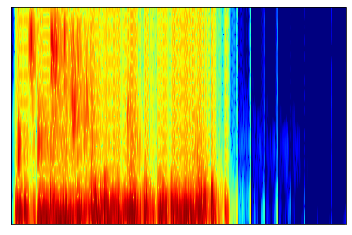

In [734]:
#30k
librosa.display.specshow(librosa.power_to_db(stft), cmap=cm.jet)

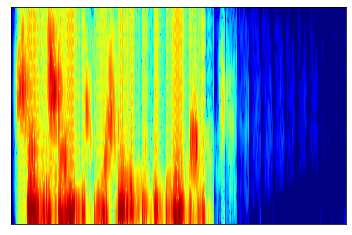

In [455]:
#20k
librosa.display.specshow(librosa.power_to_db(stft), cmap=cm.jet)

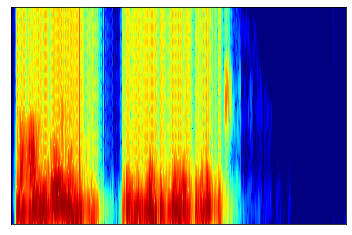

In [393]:
#18k
librosa.display.specshow(librosa.power_to_db(stft), cmap=cm.jet)

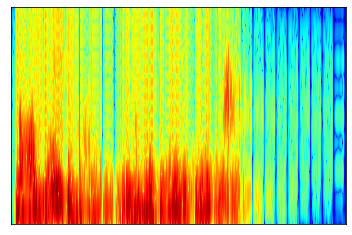

In [382]:
#16k
librosa.display.specshow(librosa.power_to_db(stft), cmap=cm.jet)

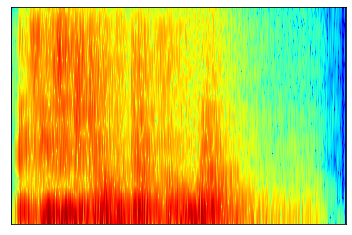

In [728]:
librosa.display.specshow(librosa.power_to_db(mag), cmap=cm.jet)

In [765]:
# checkpoint="/Users/zombie/Downloads/datadrive/17k.pt"
checkpoint="/Users/zombie/newExp3_36k.pt"
# checkpoint="/Users/zombie/diceBCE11k.pt"
from unet import UNet
net=UNet(1,1)
ckp=torch.load(checkpoint, map_location='cpu')
net.load_state_dict(ckp['modelStateDict'])
net.eval()
print('loaded')

loaded


In [767]:
out=net(torch.from_numpy(magBatch))

In [768]:
generatedAudio=reconstructAudioFromBatches(out.detach().numpy(), phaseBatch, istftParams)

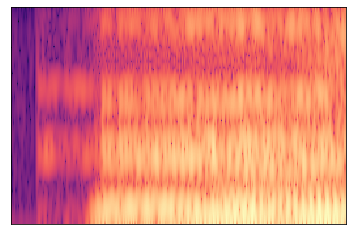

In [506]:
librosa.display.specshow(librosa.power_to_db(magBatch[0][0]))

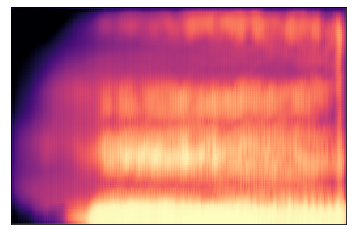

In [770]:
#newExp3_36k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

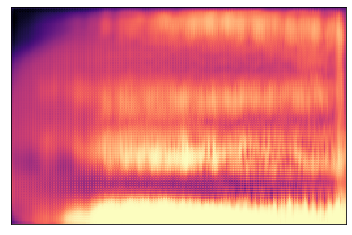

In [764]:
#newExp3_31k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

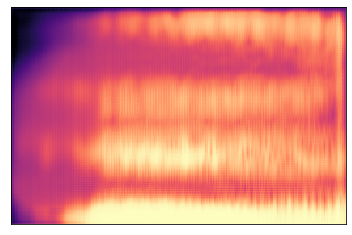

In [656]:
#newExp3_30k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

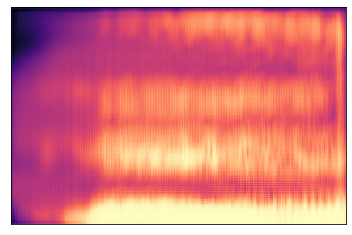

In [507]:
#newExp3_27k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

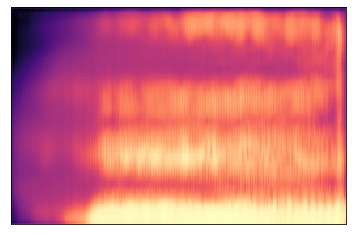

In [499]:
#newExp3_24k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

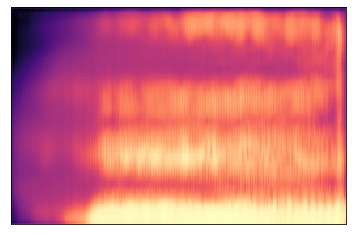

In [500]:
#newExp3_20k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

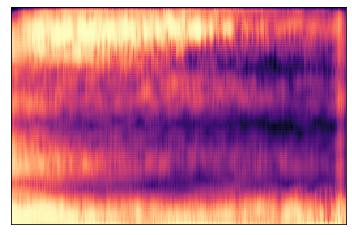

In [421]:
#newExp3_18k.pt
librosa.display.specshow(librosa.power_to_db(out[1][0].detach().numpy()))

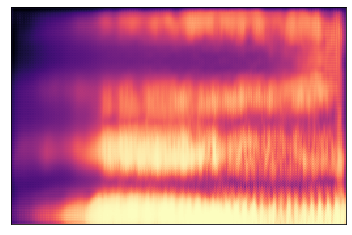

In [336]:
#newExp3_16k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

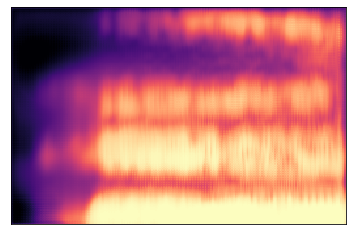

In [299]:
#newExp3_10k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

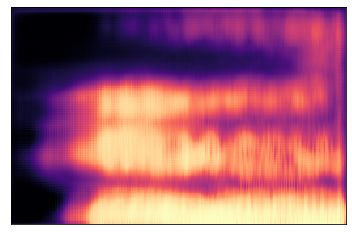

In [244]:
#newExp3_7k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

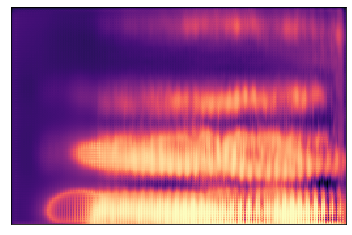

In [223]:
#newExp3_1k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

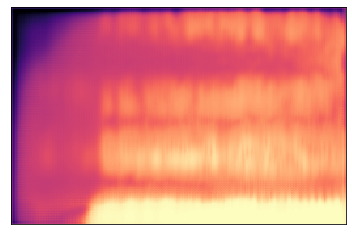

In [218]:
#newExp2_15k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

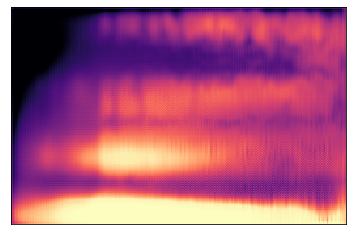

In [213]:
#newExp2_12k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

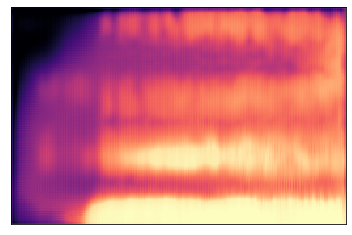

In [70]:
#newExp2_4k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

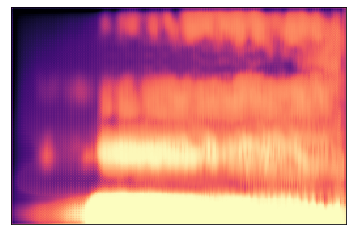

In [62]:
#batch1BCEDICE+23k
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

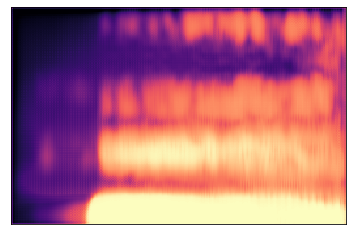

In [24]:
#batch1BCEDICE+17k
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

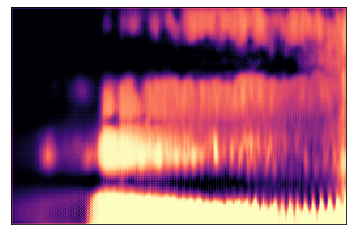

In [20]:
#batch1BCEDICE+6k
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

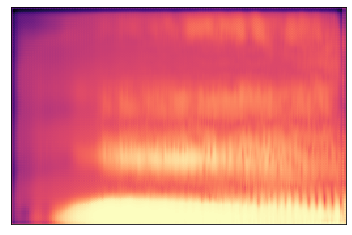

In [19]:
#32kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

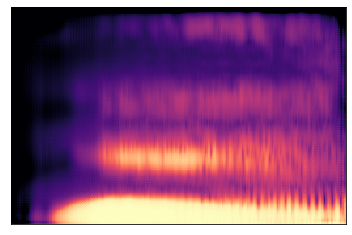

In [17]:
#21kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()**2))

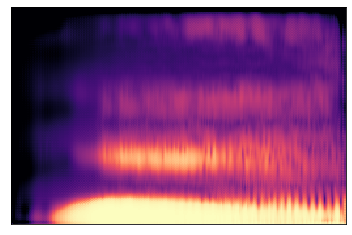

In [21]:
#19kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()**2))

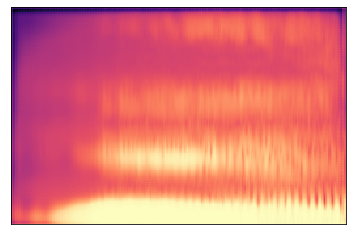

In [19]:
#17.5kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

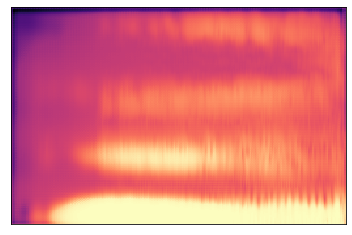

In [33]:
#14kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

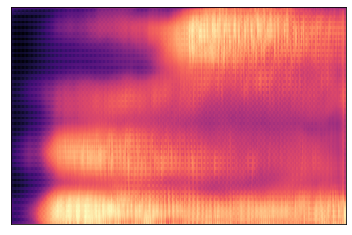

In [82]:
#6kSSIM
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

In [245]:
IPython.display.Audio(np.asarray(generatedAudio), rate=16000)

In [63]:
IPython.display.Audio(np.asarray(generatedAudio), rate=16000)

In [66]:
sf.write('23k.wav', generatedAudio, 16000)

In [20]:
IPython.display.Audio(np.asarray(generatedAudio), rate=16000)

In [32]:
IPython.display.Audio(np.asarray(generatedAudio), rate=16000)

In [21]:
IPython.display.Audio(generatedAudio, rate=16000)

In [34]:
IPython.display.Audio(generatedAudio, rate=16000)

In [83]:
IPython.display.Audio(generatedAudio, rate=16000)